In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
data_loader.generate_csv_dataset()

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=16384
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [06:43<00:00,  3.57it/s]

--- Data loaded. Loading time: 403.3257441520691 seconds ---
X.shape =  (1440, 80)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)


('data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv',
 'data/y_labels_16384.csv',
 'data/IDs_16384.csv')

# Loading Dataset

In [9]:
# X, y, ID = data_loader.load_dataset()
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
#                                     y_path='data/y_labels_16384.csv',
#                                     ID_path='data/IDs_16384.csv')

X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv', 
                                    y_path='data/y_labels_32768.csv',
                                    ID_path='data/IDs_32768.csv')

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
# print(len(X_k_folds))

data loaded in 0.03402853012084961ms
          0         1         2         3         4         5         6  \
0 -1.151378  0.323772  0.530925  0.638346  0.895739  0.666624  0.524236   
1 -1.057279  0.372491  0.213538  1.175228  1.005635  0.579586  0.891717   
2 -1.056317  0.588818  0.473571  0.718794  0.632658  0.722399  0.725295   
3 -0.975371  0.463351  0.642362  0.625777  0.830235  1.027107  0.831593   
4 -1.362673  0.773267  0.683576  0.978332  0.916855  0.884359  0.543358   

          7         8         9  ...        70        71        72        73  \
0  1.034262 -0.875917 -0.411641  ... -1.146454 -0.818756 -0.898584 -0.978988   
1  0.649381 -1.014615  0.055115  ... -0.913220 -0.697130 -1.146434 -0.805239   
2  0.575853 -0.728913 -0.691686  ... -1.372340 -1.178163 -1.031987 -1.040342   
3  0.187928 -0.744877 -0.567497  ... -0.692343 -0.933693 -0.446771 -0.819266   
4  0.913303 -0.549810 -0.838744  ... -1.103766 -1.219467 -1.223234 -0.802060   

         74        75        76

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [10]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


UAR = 0.315
C = 0.100000, gamma = 0.000316


100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


UAR = 0.320
C = 0.100000, gamma = 0.000527


100%|██████████| 5/5 [00:01<00:00,  4.63it/s]


UAR = 0.327
C = 0.100000, gamma = 0.000880


100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


UAR = 0.334
C = 0.100000, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


UAR = 0.342
C = 0.100000, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


UAR = 0.361
C = 0.100000, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.81it/s]


UAR = 0.374
C = 0.100000, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.74it/s]


UAR = 0.377
C = 0.100000, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.55it/s]


UAR = 0.352


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


UAR = 0.301


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


UAR = 0.315


100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


UAR = 0.320


100%|██████████| 5/5 [00:01<00:00,  4.80it/s]


UAR = 0.326


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.344


100%|██████████| 5/5 [00:01<00:00,  4.89it/s]


UAR = 0.363


100%|██████████| 5/5 [00:01<00:00,  4.88it/s]


UAR = 0.378
C = 0.187382, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


UAR = 0.386
C = 0.187382, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.92it/s]


UAR = 0.387
C = 0.187382, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.374


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


UAR = 0.323


100%|██████████| 5/5 [00:01<00:00,  4.31it/s]


UAR = 0.314


100%|██████████| 5/5 [00:01<00:00,  4.42it/s]


UAR = 0.323


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


UAR = 0.346


100%|██████████| 5/5 [00:01<00:00,  4.78it/s]


UAR = 0.374


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


UAR = 0.387


100%|██████████| 5/5 [00:00<00:00,  5.13it/s]


UAR = 0.400
C = 0.351119, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


UAR = 0.407
C = 0.351119, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.10it/s]


UAR = 0.414
C = 0.351119, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


UAR = 0.411


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


UAR = 0.357


100%|██████████| 5/5 [00:01<00:00,  4.89it/s]


UAR = 0.324


100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


UAR = 0.350


100%|██████████| 5/5 [00:00<00:00,  5.04it/s]


UAR = 0.370


100%|██████████| 5/5 [00:00<00:00,  5.39it/s]


UAR = 0.396


100%|██████████| 5/5 [00:01<00:00,  4.95it/s]


UAR = 0.411


100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


UAR = 0.417
C = 0.657933, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.91it/s]


UAR = 0.423
C = 0.657933, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.40it/s]


UAR = 0.424
C = 0.657933, gamma = 0.011365


100%|██████████| 5/5 [00:00<00:00,  5.18it/s]


UAR = 0.414


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


UAR = 0.391


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


UAR = 0.354


100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


UAR = 0.380


100%|██████████| 5/5 [00:00<00:00,  5.27it/s]


UAR = 0.397


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


UAR = 0.406


100%|██████████| 5/5 [00:00<00:00,  5.77it/s]


UAR = 0.415


100%|██████████| 5/5 [00:00<00:00,  5.92it/s]


UAR = 0.449
C = 1.232847, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.92it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


UAR = 0.445


100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


UAR = 0.433


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


UAR = 0.396


100%|██████████| 5/5 [00:00<00:00,  5.13it/s]


UAR = 0.380


100%|██████████| 5/5 [00:00<00:00,  5.42it/s]


UAR = 0.406


100%|██████████| 5/5 [00:00<00:00,  5.55it/s]


UAR = 0.406


100%|██████████| 5/5 [00:00<00:00,  5.97it/s]


UAR = 0.423


100%|██████████| 5/5 [00:00<00:00,  6.15it/s]


UAR = 0.458
C = 2.310130, gamma = 0.002448


100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.16it/s]


UAR = 0.458
C = 2.310130, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.393


100%|██████████| 5/5 [00:00<00:00,  5.31it/s]


UAR = 0.408


100%|██████████| 5/5 [00:00<00:00,  5.80it/s]


UAR = 0.409


100%|██████████| 5/5 [00:00<00:00,  6.16it/s]


UAR = 0.427


100%|██████████| 5/5 [00:00<00:00,  6.31it/s]


UAR = 0.461
C = 4.328761, gamma = 0.001468


100%|██████████| 5/5 [00:00<00:00,  6.61it/s]


UAR = 0.465
C = 4.328761, gamma = 0.002448


100%|██████████| 5/5 [00:00<00:00,  6.61it/s]


UAR = 0.475
C = 4.328761, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


UAR = 0.473


100%|██████████| 5/5 [00:01<00:00,  4.93it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.431


100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


UAR = 0.395


100%|██████████| 5/5 [00:00<00:00,  5.90it/s]


UAR = 0.415


100%|██████████| 5/5 [00:00<00:00,  6.15it/s]


UAR = 0.432


100%|██████████| 5/5 [00:00<00:00,  6.46it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  6.66it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.77it/s]


UAR = 0.471


100%|██████████| 5/5 [00:00<00:00,  6.65it/s]


UAR = 0.476
C = 8.111308, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.467


100%|██████████| 5/5 [00:01<00:00,  4.87it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


UAR = 0.395


100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


UAR = 0.438


100%|██████████| 5/5 [00:00<00:00,  6.58it/s]


UAR = 0.457


100%|██████████| 5/5 [00:00<00:00,  6.74it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  6.84it/s]


UAR = 0.470


100%|██████████| 5/5 [00:00<00:00,  6.81it/s]


UAR = 0.465


100%|██████████| 5/5 [00:00<00:00,  6.57it/s]


UAR = 0.480
C = 15.199111, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.71it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


UAR = 0.449


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


UAR = 0.433


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


UAR = 0.395


100%|██████████| 5/5 [00:00<00:00,  6.61it/s]


UAR = 0.455


100%|██████████| 5/5 [00:00<00:00,  6.83it/s]


UAR = 0.457


100%|██████████| 5/5 [00:00<00:00,  7.00it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.91it/s]


UAR = 0.459


100%|██████████| 5/5 [00:00<00:00,  6.80it/s]


UAR = 0.469


100%|██████████| 5/5 [00:00<00:00,  6.42it/s]


UAR = 0.480


100%|██████████| 5/5 [00:00<00:00,  5.69it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.449


100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


UAR = 0.433


100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


UAR = 0.395


100%|██████████| 5/5 [00:00<00:00,  6.75it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.92it/s]


UAR = 0.453


100%|██████████| 5/5 [00:00<00:00,  7.00it/s]


UAR = 0.453


100%|██████████| 5/5 [00:00<00:00,  6.80it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.58it/s]


UAR = 0.467


100%|██████████| 5/5 [00:00<00:00,  6.32it/s]


UAR = 0.476


100%|██████████| 5/5 [00:00<00:00,  5.69it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.449


100%|██████████| 5/5 [00:01<00:00,  4.27it/s]


UAR = 0.433


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.395


100%|██████████| 5/5 [00:00<00:00,  6.98it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  6.91it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  6.69it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  6.58it/s]


UAR = 0.461


100%|██████████| 5/5 [00:00<00:00,  6.54it/s]


UAR = 0.472


100%|██████████| 5/5 [00:00<00:00,  5.93it/s]


UAR = 0.475


100%|██████████| 5/5 [00:00<00:00,  5.70it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.79it/s]


UAR = 0.449


100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


UAR = 0.433


100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

UAR = 0.395
UAR_best = 0.480, C_best = 15.199111, gamma_best = 0.004084


## Result visualization

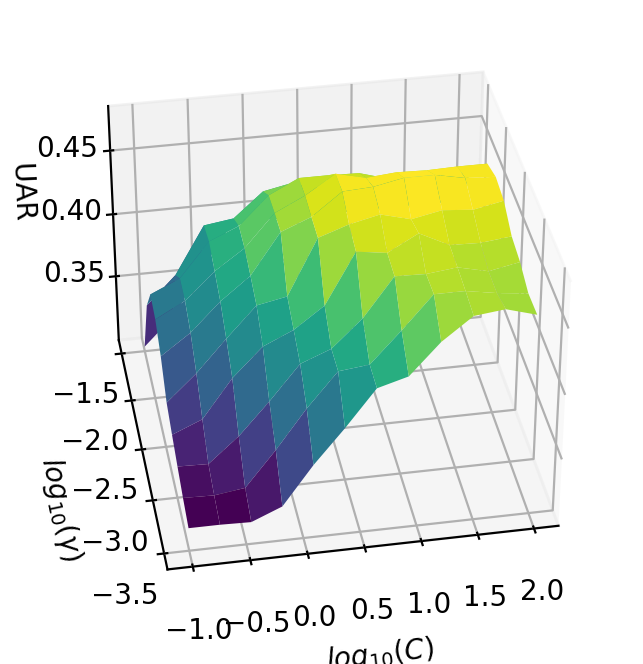

In [11]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')                
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

# Confusion matrix

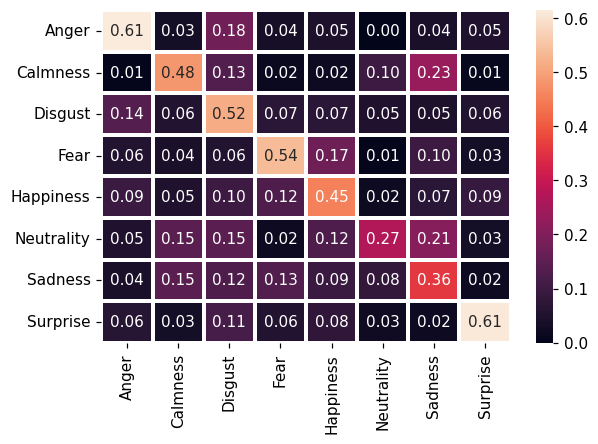

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [12]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)